In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aliceinwonderland/alice-in-wonderland.txt


In [2]:
file1 = open('../input/aliceinwonderland/alice-in-wonderland.txt', 'r')
txt = file1.read()

txt = txt.lower()

In [3]:
# REmoving Puncation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(txt)

['project',
 'gutenberg',
 's',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'title',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 '25',
 '2008',
 'ebook',
 '11',
 'release',
 'date',
 'march',
 '1994',
 'last',
 'updated',
 'december',
 '20',
 '2011',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'ascii',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'alice',
 's',
 '

In [4]:
txt

'project gutenberg\'s alice\'s adventures in wonderland, by lewis carroll\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: alice\'s adventures in wonderland\n\nauthor: lewis carroll\n\nposting date: june 25, 2008 [ebook #11]\nrelease date: march, 1994\n[last updated: december 20, 2011]\n\nlanguage: english\n\ncharacter set encoding: ascii\n\n*** start of this project gutenberg ebook alice\'s adventures in wonderland ***\n\n\n\n\n\n\n\n\n\n\nalice\'s adventures in wonderland\n\nlewis carroll\n\nthe millennium fulcrum edition 3.0\n\n\n\n\nchapter i. down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conv

In [5]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [6]:
from nltk import sent_tokenize
sentences = sent_tokenize(txt)

In [7]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(txt)

In [8]:
# Removing all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]

In [9]:
words

['project',
 'gutenberg',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'title',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 'ebook',
 'release',
 'date',
 'march',
 'last',
 'updated',
 'december',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'ascii',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'lewis',
 'carroll',
 'the',
 'millennium',
 'fulcrum',
 'edition',
 'chapter',
 'down'

In [10]:
# Removing stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]


In [11]:
# Stemming the words 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]


# **Text is cleaned** !!

In [12]:
stemmed

['project',
 'gutenberg',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'term',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'ebook',
 'onlin',
 'titl',
 'alic',
 'adventur',
 'wonderland',
 'author',
 'lewi',
 'carrol',
 'post',
 'date',
 'june',
 'ebook',
 'releas',
 'date',
 'march',
 'last',
 'updat',
 'decemb',
 'languag',
 'english',
 'charact',
 'set',
 'encod',
 'ascii',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alic',
 'adventur',
 'wonderland',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'millennium',
 'fulcrum',
 'edit',
 'chapter',
 'alic',
 'begin',
 'get',
 'tire',
 'sit',
 'sister',
 'bank',
 'noth',
 'twice',
 'peep',
 'book',
 'sister',
 'read',
 'pictur',
 'convers',
 'use',
 'book',
 'thought',
 'alic',
 'pictur',
 'convers',
 'consid',
 'mind',
 'well',
 'could',
 'hot',
 'day',
 'made',
 'feel',
 'sleepi',
 'st

In [13]:
final = stemmed

In [14]:
# Without stemming the words
words 

['project',
 'gutenberg',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'terms',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'title',
 'alice',
 'adventures',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 'ebook',
 'release',
 'date',
 'march',
 'last',
 'updated',
 'december',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'ascii',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'millennium',
 'fulcrum',
 'edition',
 'chapter',
 'alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sister',
 'bank',
 'nothing',
 'twice',
 'peeped',
 'book',
 'sister',
 'reading',
 'pictures',
 'conversations',
 'use',
 'book',
 'thought',
 'alice',
 'pictures',
 'conversations',
 'co

In [15]:
from collections import Counter
counts = Counter(words)

counts

Counter({'project': 87,
         'gutenberg': 30,
         'alice': 401,
         'adventures': 12,
         'wonderland': 8,
         'lewis': 4,
         'carroll': 4,
         'ebook': 9,
         'use': 29,
         'anyone': 5,
         'anywhere': 3,
         'cost': 4,
         'almost': 8,
         'restrictions': 2,
         'whatsoever': 2,
         'may': 28,
         'copy': 12,
         'give': 13,
         'away': 28,
         'terms': 22,
         'license': 15,
         'included': 3,
         'online': 4,
         'title': 1,
         'author': 1,
         'posting': 1,
         'date': 4,
         'june': 1,
         'release': 1,
         'march': 35,
         'last': 34,
         'updated': 2,
         'december': 1,
         'language': 1,
         'english': 7,
         'character': 2,
         'set': 23,
         'encoding': 1,
         'ascii': 3,
         'start': 3,
         'millennium': 1,
         'fulcrum': 1,
         'edition': 2,
         'chapter': 12,

In [16]:
len(counts)

2767

# First divide the words into clusters that are relevant to each other
# Then try plotting them using TSNE
# Then HYPERBOLIC EMBEDDINGS !!

# Dividing the words into relevant clusters

# Visualizing the frequencies of words

## from nltk import FreqDist

fdist_filtered = FreqDist(words)
fdist_filtered.plot(10, title = 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

# *****************************************************************************

In [17]:
fdist_filtered,plot()

NameError: name 'fdist_filtered' is not defined

In [ ]:
import re # For preprocessing 
import pandas as pd # For data handling
from time import time # To time our operations
from collections import defaultdict # For word frequency

import spacy # For preprocessing

import logging # Set up loggings to monitor gensim
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", 
                   datefmt = '%H:%M:%S', level=logging.INFO)

# Using Sentence Tokenizer

In [ ]:
from nltk import sent_tokenize

file1 = open('../input/aliceinwonderland/alice-in-wonderland.txt', 'r')
txt = file1.read()
sentences = sent_tokenize(txt)

In [ ]:
sentences

# 1. Substituting \n (new line) escape sequence with blank

# 2. Removing stopwords

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re

field = []

for line in sentences: 
    
    x = re.sub(r'\n',r' ',line)
    words = [w for w in str(x) if not w in stop_words]
    
    field.append(str(x))
    
field
    

["project gutenberg's alice's adventures in wonderland, by lewis carroll  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",
 "you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org   title: alice's adventures in wonderland  author: lewis carroll  posting date: june 25, 2008 [ebook #11] release date: march, 1994 [last updated: december 20, 2011]  language: english  character set encoding: ascii  *** start of this project gutenberg ebook alice's adventures in wonderland ***           alice's adventures in wonderland  lewis carroll  the millennium fulcrum edition 3.0     chapter i. down the rabbit-hole  alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a bo

# Creating a dataframe for the filtered data

In [21]:
df = pd.DataFrame(field)

In [22]:
df

0
0     project gutenberg's alice's adventures in wond...
1     you may copy it, give it away or re-use it und...
2     so she was considering in her own mind (as wel...
3     there was nothing so very remarkable in that; ...
4                                              oh dear!
...                                                 ...
1731  professor michael s. hart is the originator of...
1732  for thirty years, he produced and distributed ...
1733  project gutenberg-tm ebooks are often created ...
1734  thus, we do not necessarily keep ebooks in com...
1735  most people start at our web site which has th...

[1736 rows x 1 columns]

In [23]:
df.isnull().sum()

0    0
dtype: int64

# Check 1: No null data

In [25]:
df_clean = df.drop_duplicates()

In [26]:
df_clean.shape

(1683, 1)

In [27]:
from gensim.models.phrases import Phrases, Phraser

In [28]:
sent = df_clean

In [29]:
sent

0
0     project gutenberg's alice's adventures in wond...
1     you may copy it, give it away or re-use it und...
2     so she was considering in her own mind (as wel...
3     there was nothing so very remarkable in that; ...
4                                              oh dear!
...                                                 ...
1731  professor michael s. hart is the originator of...
1732  for thirty years, he produced and distributed ...
1733  project gutenberg-tm ebooks are often created ...
1734  thus, we do not necessarily keep ebooks in com...
1735  most people start at our web site which has th...

[1683 rows x 1 columns]

In [30]:
phrases = Phrases(sent[0], min_count=30, progress_per = 10000)

bigram = Phraser(phrases)

In [31]:
sentences = bigram[sent[0]]

In [32]:
sentences

["project gutenberg's alice's adventures in wonderland, by lewis carroll  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",
 "you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org   title: alice's adventures in wonderland  author: lewis carroll  posting date: june 25, 2008 [ebook #11] release date: march, 1994 [last updated: december 20, 2011]  language: english  character set encoding: ascii  *** start of this project gutenberg ebook alice's adventures in wonderland ***           alice's adventures in wonderland  lewis carroll  the millennium fulcrum edition 3.0     chapter i. down the rabbit-hole  alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a bo

In [33]:
from nltk.tokenize import word_tokenize

tokenized_sentences=[]

for s in sentences:
    
    tokenized_sentences.append(word_tokenize(s.lower()))
    
tokenized_sentences

[['project',
  'gutenberg',
  "'s",
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  ',',
  'by',
  'lewis',
  'carroll',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.'],
 ['you',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  'title',
  ':',
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  'author',
  ':',
  'lewis',
  'carroll',
  'posting',
  'date',
  ':',
  'june',
  '25',
  ',',
  '2008',
  '[',
  'ebook',
  '#',
  '11',
  ']',
  'release',
  'date',
  ':',
  'march',
  ',',
  '1994',
  '[',
  'last',
  'updated',
  ':',
  'december',
  '20',
  ',',
  '2011',
  ']',
  'language',
  ':'

# Creating Knowledge graphs from https://www.kaggle.com/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk

In [34]:
import re
import pandas as pd
import bs4
import requests
import spacy

import networkx as nx
import matplotlib.pyplot as plt

from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [35]:
# import wikipedia sentences

candidate_sentence = pd.DataFrame(sentences)

In [36]:
candidate_sentence

0
0                                 project gutenberg's alice's adventures in wonderland, by lewis carroll  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.
1     you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org   title: alice's adventures in wonderland  autho...
2     so she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of gett...
3                                                                there was nothing so very remarkable in that; nor did alice think it so very much out of the way to hear the rabbit say to itself, 'oh dear!
4                                                                                                                                                                                                    oh dear!
...                                                                                                                                                                                                       ...
1678                                                professor michael s. hart is the originator of the project gutenberg-tm concept of a library of electronic works that could be freely shared with anyone.
1679                                                                                for thirty years, he produced and distributed project gutenberg-tm ebooks with only a loose network of volunteer support.
1680                              project gutenberg-tm ebooks are often created from several printed editions, all of which are confirmed as public domain in the u.s. unless a copyright notice is included.
1681                                                                                                                 thus, we do not necessarily keep ebooks in compliance with any particular paper edition.
1682  most people start at our web site which has the main pg search facility:       http://www.gutenberg.org  this web site includes information about project gutenberg-tm, including how to make donati...

[1683 rows x 1 columns]

In [37]:
candidate_sentence[0].sample(5)

644    'which would not be an advantage,' said alice, who felt very glad to get an opportunity of showing off a little of her knowledge.
957                                                                                                            'you shan't be beheaded!'
566                                                                                   said the pigeon in a tone of the deepest contempt.
366                                                                                                                           'mary ann!
149                                                             as she said these words her foot slipped, and in another moment, splash!
Name: 0, dtype: object

# Sentence segmentation

We will shortlist only those sentences in which there is exactly 1 subject and 1 object

In [38]:
doc = nlp('the drawdown process is governed by astm standard d823')

for tok in doc:
    
    print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


Function to extract subject and object (entities) from a sentence while also overcoming challenges such as getting nodes and edges between them.

Have divided the code into multiple chunks for easy understanding

We will extract these elements in an unsupervised manner i.e., we will use the grammar of the sentences

In [39]:


def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]



In [40]:
get_entities("the film had 200 patents")


['film', '200  patents']

In [41]:
entity_pairs = []

for i in tqdm(candidate_sentence[0]):
  entity_pairs.append(get_entities(i))

100%|██████████| 1683/1683 [00:20<00:00, 82.08it/s]


# Nodes are extracted

# Now , we need EDGES between the Nodes

In [42]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [43]:
get_relation("John completed the task")

'completed'

In [44]:
relations = [get_relation(i) for i in tqdm(candidate_sentence[0])]

100%|██████████| 1683/1683 [00:19<00:00, 86.79it/s]


In [45]:
pd.Series(relations).value_counts()[:50]

said         268
was           67
's            39
is            32
went          22
said to       21
think         20
thought       20
know          17
are           16
began         15
replied       14
tell          14
be            13
asked         13
got           12
cried         11
had           11
wonder        11
come          11
looked        11
wish          10
let           10
suppose       10
like          10
say            9
do             9
have           9
see            9
were           8
go             8
get            8
added          7
'              7
sat            7
took           7
tried          7
did            7
'm             7
remarked       6
take           6
alice          6
looked at      6
came           6
shook          5
gave           5
dear           5
repeated       5
'm afraid      5
make           5
dtype: int64

# Build Knowledge Graph

In [46]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [47]:


# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())



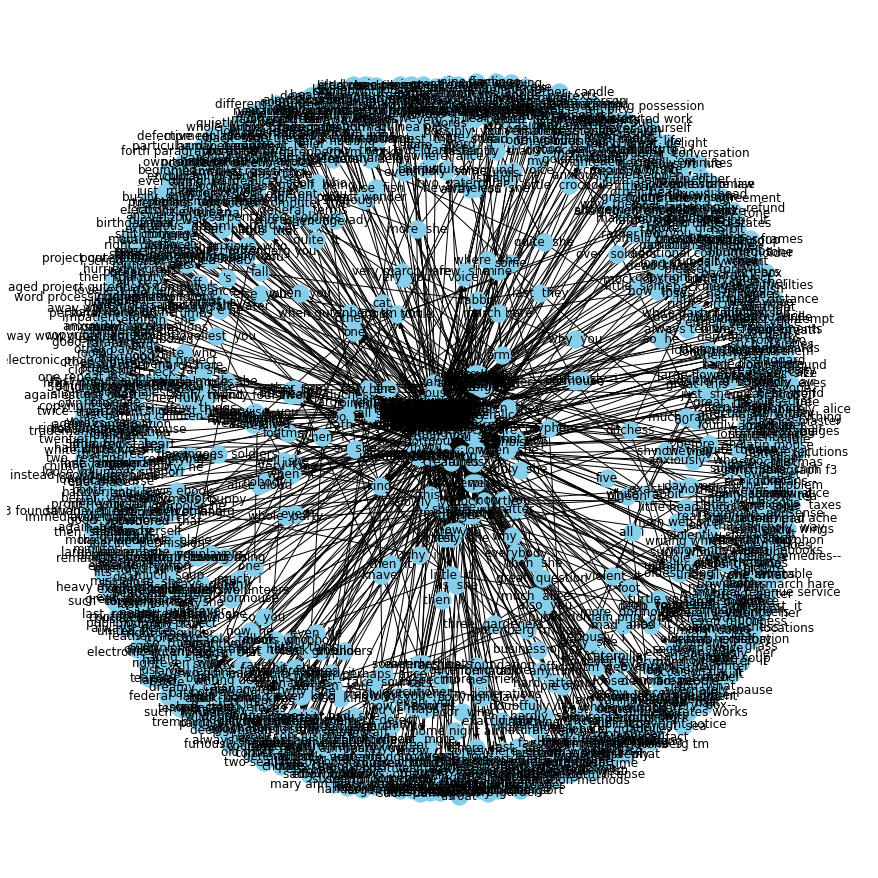

In [48]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Not what we were expecting 

Seems like this can be much better represented in hyperbolic space

Was unable to install graphviz hence trying to 1st install via apt-get install

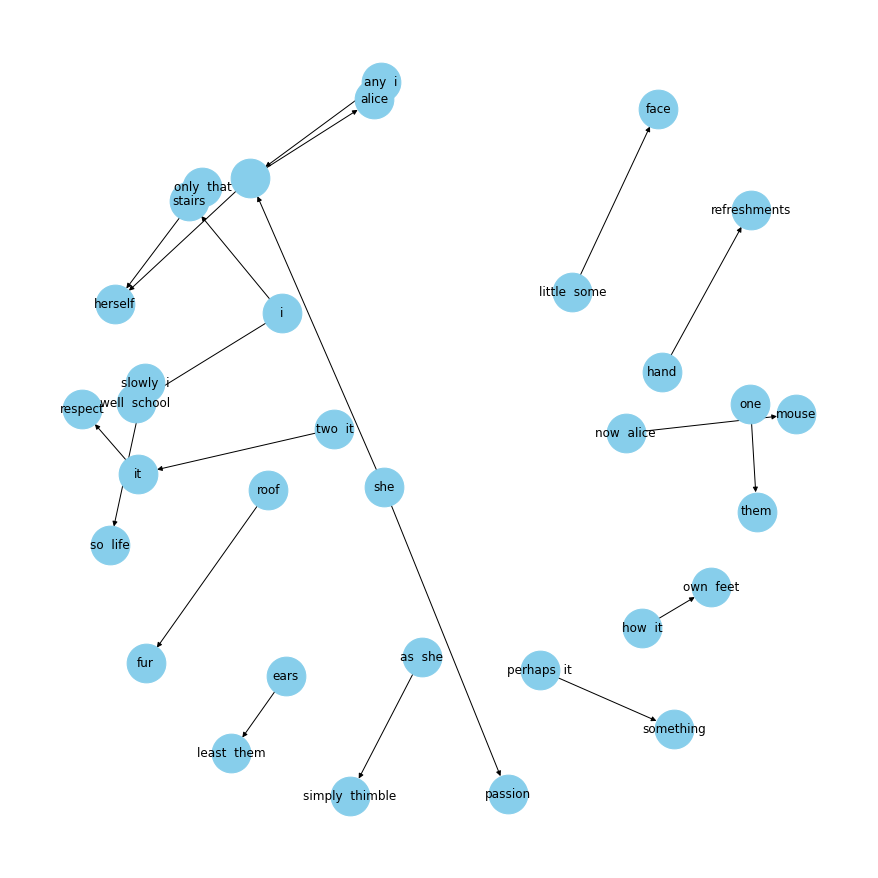

In [49]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="thought"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes

#pos = graphviz_layout(G, prog="twopi", args = "") #for circular graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

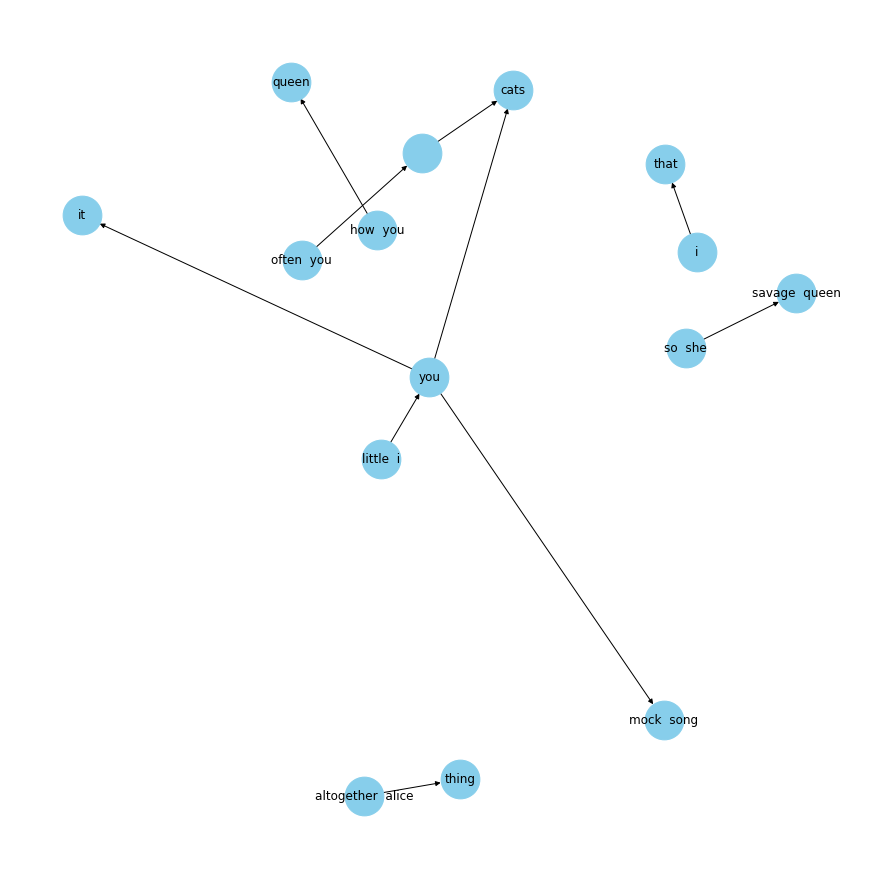

In [50]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="like"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [51]:
G.degree

DiMultiDegreeView({'': 2, 'cats': 2, 'you': 4, 'little  i': 1, 'i': 1, 'that': 1, 'often  you': 1, 'altogether  alice': 1, 'thing': 1, 'how  you': 1, 'queen': 1, 'so  she': 1, 'savage  queen': 1, 'it': 1, 'mock  song': 1})

In [52]:
G.edges()

OutMultiEdgeDataView([('', 'cats'), ('you', 'cats'), ('you', 'it'), ('you', 'mock  song'), ('little  i', 'you'), ('i', 'that'), ('often  you', ''), ('altogether  alice', 'thing'), ('how  you', 'queen'), ('so  she', 'savage  queen')])

In [53]:
L = G.number_of_nodes()
L

15

Interactive visualization between networkx, plotly and dash

In [54]:
# igraph : Library for high performance graph generation and analysis
import igraph as ig


In [55]:
# Remember : G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="like"], "source", "target", 
#                          edge_attr=True, create_using=nx.MultiDiGraph())

N = G.nodes
N

NodeView(('', 'cats', 'you', 'little  i', 'i', 'that', 'often  you', 'altogether  alice', 'thing', 'how  you', 'queen', 'so  she', 'savage  queen', 'it', 'mock  song'))

In [56]:
Xv = [pos[k][0] for k in N]
Yv = [pos[k][1] for k in N]

In [57]:
Xed = []
Yed = []

pos=nx.fruchterman_reingold_layout(G)

In [58]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())



In [59]:
from plotly.graph_objects import Scatter, Figure
import chart_studio.plotly as py

for edge in G.edges():
    
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]
    
    
trace3 = Scatter(x = Xed,
                y = Yed,
                mode = 'lines',
                line = dict(color = 'rgb(210, 210, 210)', width = 1),
                hoverinfo = 'none'
                )

trace4 = Scatter(x = Xv,
                y = Yv,
                mode = 'markers',
                name = 'net',
                marker = dict(symbol = 'circle-dot',
                             size = 5,
                             color = '#6959CD',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               # text = labels,
                hoverinfo = 'text'
                )



annot="This networkx.Graph has the Fruchterman-Reingold layout<br>Code:"

data1 = [trace3, trace4]
fig1 = Figure(data = data1) 
             #layout = layout)
#fig1['layout']['annotations'][0]['text'] = annot
from plotly.offline import plot
plot( fig1, filename ="temp-plot.html", validate = False )

ModuleNotFoundError: No module named 'chart_studio'

# Output : temp-plot.html

# Trying out POINCARE EMBEDDINGS ( GENSIM )

models.poincare : [Train and Use Poincare Embeddings](http://https://radimrehurek.com/gensim/models/poincare.html)

In [60]:
 !pip install --upgrade gensim

Requirement already up-to-date: gensim in /opt/conda/lib/python3.7/site-packages (3.8.3)
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [61]:
from gensim.models.poincare import PoincareRelations
from gensim.models.poincare import PoincareModel
from gensim.models import KeyedVectors

In [62]:
entity_pairs

[['lewis ebook', 'no  restrictions'],
 ['use', 'pictures'],
 ['white daisy rabbit', 'close  her'],
 ['much  rabbit', 'itself'],
 ['', ''],
 ['i', ''],
 ['just  it', 'large rabbit hedge'],
 ['how  she', 'how  world'],
 ['herself', 'herself'],
 ['what', 'her'],
 ['maps', 'pegs'],
 ['so  she', 'it'],
 ['', ''],
 ['i', 'stairs'],
 ['how  they', 'all  home'],
 ['even  i', 'house'],
 ['which', ''],
 ['', ''],
 ['fall', 'end'],
 ['many  i', 'time'],
 ['she', ''],
 ['i', 'somewhere  earth'],
 ['i', 'right  distance'],
 ['either  they', 'idea'],
 ['presently  she', ''],
 ['i', 'right  earth'],
 ['that', 'heads'],
 ['you', 'country'],
 ['', ''],
 ['fancy  you', 'air'],
 ['you', 'it'],
 ['girl  she', 'me'],
 ['it', ''],
 ['else  alice', ''],
 ['to night to i', 'me'],
 ['dinah', ''],
 ['they', 'tea time'],
 ['', 'dear'],
 ['you', 'here  me'],
 ['very  you', 'very  mouse'],
 ['i', 'bats'],
 ['dreamy  cats', 'bats'],
 ['cats', 'bats'],
 ['sometimes  bats', 'cats'],
 ['way  she', 'it'],
 ['dinah  you

In [63]:
# Size is required for 2d plotting

model = PoincareModel(entity_pairs, negative = 4)



Training the model

In [64]:
model.train(epochs = 100)

Visualizing the poincare embedding

In [65]:
from gensim.viz import poincare

In [66]:
import gensim

In [67]:
relations

['is for',
 'beginning',
 'considering in',
 'was',
 'dear',
 'be late',
 'ran across',
 'went',
 'went',
 'was',
 'saw',
 'labelled',
 'well',
 'thought',
 'think',
 'say',
 'was',
 'down',
 'come to',
 'wonder',
 'said',
 'getting',
 'got to',
 'had',
 'began',
 'wonder',
 'seem',
 'have',
 'is',
 'tried',
 'think',
 'think',
 'do',
 'was',
 'think',
 'was',
 'hope',
 'dinah',
 'wish',
 "'m afraid",
 'wonder',
 'began',
 'eat',
 'eat',
 'for',
 'felt',
 'thump',
 'thump',
 'came upon',
 'was',
 'went alice',
 'was',
 'were',
 'was',
 'were',
 'tried',
 'knelt',
 'longed',
 'wish',
 'think',
 'begun',
 'said',
 'was',
 'said',
 'ventured',
 'feeling',
 'said',
 'was',
 'said',
 'wonder',
 'tried',
 'decided on',
 'found',
 "'s",
 'said',
 'gave',
 "'s",
 "'s",
 'opened',
 'get into',
 'ate',
 'way',
 'seemed',
 'set',
 'ii',
 'pool of',
 'opening',
 'bye',
 'getting',
 'dears',
 'be able',
 'manage',
 'give',
 'went on',
 'thought',
 'look',
 'foot',
 'hearthrug',
 'talking',
 'was',


In [68]:
model.kv.syn0

array([[ 0.02257249, -0.39949963, -0.07153172, ...,  0.01621935,
         0.13467659, -0.1174729 ],
       [ 0.02175048, -0.38055935, -0.06803544, ...,  0.0152553 ,
         0.12808613, -0.11198562],
       [ 0.13847682, -0.36250908,  0.01175181, ...,  0.15097255,
         0.05035297, -0.06013881],
       ...,
       [ 0.09808707, -0.19322789,  0.05856468, ...,  0.04511297,
         0.09894275, -0.03195548],
       [ 0.2894317 , -0.29243343, -0.0671108 , ...,  0.20303163,
         0.03978487, -0.16192395],
       [ 0.26151834, -0.26391154, -0.0604    , ...,  0.18307907,
         0.03569129, -0.14647066]])

In [71]:
from gensim.models import KeyedVectors
# from gensim.test.utils import lee_corpus_list

from gensim.models import Word2Vec


result = model.kv.most_similar("alice")

In [72]:
result

[('now  garden', 0.020795112769039982),
 ('great  conversation', 0.025324335952087808),
 ('great  surprise', 0.0385403403304383),
 ('own  courage', 0.04339724467001769),
 ('melancholy  voice', 0.048414425503945376),
 ('opinion', 0.05212183380360505),
 ('uglification', 0.05628059863030187),
 ('curiosity', 0.05912846145793091),
 ('unwillingly march hare', 0.05922011389219152),
 ('little  laughter', 0.07293815769274946)]

In [73]:
model

In [74]:
fig = gensim.viz.poincare.poincare_2d_visualization(model,tuple(entity_pairs), 'Exp', num_nodes = 10, show_node_labels = ())

# Error since the model does not have a dimensionality 2

ValueError: Can only plot 2-D vectors

In [76]:
model.kv.distance("alice", "little")

3.3166556629514186

In [77]:
entity_pairs

[['lewis ebook', 'no  restrictions'],
 ['use', 'pictures'],
 ['white daisy rabbit', 'close  her'],
 ['much  rabbit', 'itself'],
 ['', ''],
 ['i', ''],
 ['just  it', 'large rabbit hedge'],
 ['how  she', 'how  world'],
 ['herself', 'herself'],
 ['what', 'her'],
 ['maps', 'pegs'],
 ['so  she', 'it'],
 ['', ''],
 ['i', 'stairs'],
 ['how  they', 'all  home'],
 ['even  i', 'house'],
 ['which', ''],
 ['', ''],
 ['fall', 'end'],
 ['many  i', 'time'],
 ['she', ''],
 ['i', 'somewhere  earth'],
 ['i', 'right  distance'],
 ['either  they', 'idea'],
 ['presently  she', ''],
 ['i', 'right  earth'],
 ['that', 'heads'],
 ['you', 'country'],
 ['', ''],
 ['fancy  you', 'air'],
 ['you', 'it'],
 ['girl  she', 'me'],
 ['it', ''],
 ['else  alice', ''],
 ['to night to i', 'me'],
 ['dinah', ''],
 ['they', 'tea time'],
 ['', 'dear'],
 ['you', 'here  me'],
 ['very  you', 'very  mouse'],
 ['i', 'bats'],
 ['dreamy  cats', 'bats'],
 ['cats', 'bats'],
 ['sometimes  bats', 'cats'],
 ['way  she', 'it'],
 ['dinah  you

In [82]:
model.kv.similar_by_word('alice')

AttributeError: 'PoincareKeyedVectors' object has no attribute 'similar_by_word'

In [83]:
# model in 2D

model = PoincareModel(entity_pairs, negative = 4, size = 2)


In [84]:
from gensim.models.poincare import PoincareRelations
from gensim.test.utils import datapath


relation_gensim = PoincareRelations(model)

import plotly

import gensim.viz.poincare

plotly.offline.init_notebook_mode(connected = False)

fig = gensim.viz.poincare.poincare_2d_visualization(model = model, 
                                           tree = entity_pairs, 
                                           figure_title = "tutorial",
                                           )

plotly.offline.iplot(fig)

In [87]:
model.kv.closest_child("alice")

'when  one'

In [88]:
# https://github.com/harmanpreet93/poincare-embedding-using-gensim/blob/master/poincare-embeddings-using-gensim.ipynb
new_model = PoincareModel(train_data = entity_pairs,
                          size = 2,
                          burn_in = 0,
                          workers = 1,
                          negative = 10)

# Difference : burn_in initialization

# Older Model training step done : 
# model = PoincareModel(entity_pairs, negative = 4, size = 2)

new_model.train(epochs = 100, print_every = 400, batch_size = 10)

In [89]:
from gensim.viz.poincare import poincare_2d_visualization, poincare_distance_heatmap

fig = poincare_2d_visualization(
    new_model,
    entity_pairs,
    "Poincare Hierarchy",
    show_node_labels=entity_pairs)

In [90]:
fig

In [92]:
new_model_without_2d = PoincareModel(train_data = entity_pairs,
                          burn_in = 0,
                          workers = 1,
                          negative = 10)

new_model_without_2d.train(epochs = 100, print_every = 400, batch_size = 10)

In [93]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

tsne_model = TSNE(n_components = 3, verbose = 1, random_state = 0, angle = .99, init = 'pca', perplexity = 40)

tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[new_model_without_2d.kv.vocab])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1404 samples in 0.009s...
[t-SNE] Computed neighbors for 1404 samples in 0.231s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1404
[t-SNE] Computed conditional probabilities for sample 1404 / 1404
[t-SNE] Mean sigma: 0.041189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.009232
[t-SNE] KL divergence after 1000 iterations: 0.592712


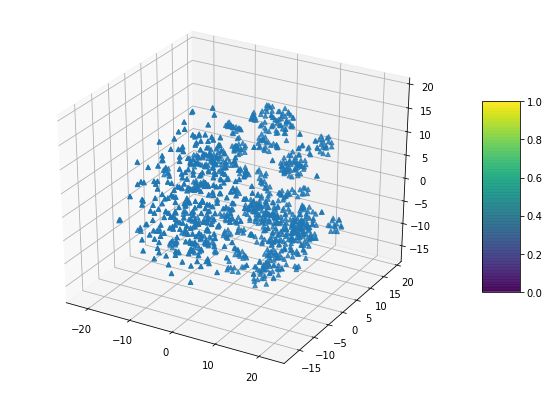

In [94]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#fog = plt.scatter(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2], cmap = 'RdBu')

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")

#ax.scatter3D(*zip(*tsne_poincare))
sctt = ax.scatter3D(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2],
            alpha = 0.8,
            cmap = plt.get_cmap('hsv'),
            marker = '^')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()
plt.show()

In [95]:
model.kv.vocab

{'lewis ebook': <gensim.models.keyedvectors.Vocab at 0x7fc38c0e8110>,
 'no  restrictions': <gensim.models.keyedvectors.Vocab at 0x7fc38c0e8b90>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7fc38c0ae850>,
 'pictures': <gensim.models.keyedvectors.Vocab at 0x7fc38c042150>,
 'white daisy rabbit': <gensim.models.keyedvectors.Vocab at 0x7fc38c042210>,
 'close  her': <gensim.models.keyedvectors.Vocab at 0x7fc38c042250>,
 'much  rabbit': <gensim.models.keyedvectors.Vocab at 0x7fc38c042290>,
 'itself': <gensim.models.keyedvectors.Vocab at 0x7fc38c042310>,
 '': <gensim.models.keyedvectors.Vocab at 0x7fc38c042350>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fc38c042390>,
 'just  it': <gensim.models.keyedvectors.Vocab at 0x7fc38c0423d0>,
 'large rabbit hedge': <gensim.models.keyedvectors.Vocab at 0x7fc38c042410>,
 'how  she': <gensim.models.keyedvectors.Vocab at 0x7fc38c042450>,
 'how  world': <gensim.models.keyedvectors.Vocab at 0x7fc38c042490>,
 'herself': <gensim.models.keyedvectors.Vocab

In [96]:
model.kv[model.kv.vocab]

array([[ 9.76270079e-05,  4.30378733e-04],
       [ 2.05526752e-04,  8.97663660e-05],
       [-1.52690401e-04,  2.91788226e-04],
       ...,
       [-9.89896260e-04, -6.27392967e-04],
       [ 9.59728237e-04,  7.34572154e-04],
       [-4.66990723e-04,  9.27497714e-04]])

In [97]:
import plotly.express as px

fig = plt.figure(figsize = (20, 20))

fig = px.scatter_3d(df, x=tsne_poincare[:, 0], y=tsne_poincare[:, 1], z=tsne_poincare[:, 2],
                    color= tuple(new_model_without_2d.kv.vocab),
                    title="3D Scatter Plot")


fig.show()



<Figure size 1440x1440 with 0 Axes>

In [98]:
new_model_without_2d.kv.vocab

{'lewis ebook': <gensim.models.keyedvectors.Vocab at 0x7fc38e46df10>,
 'no  restrictions': <gensim.models.keyedvectors.Vocab at 0x7fc38e46d990>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7fc38e46dd10>,
 'pictures': <gensim.models.keyedvectors.Vocab at 0x7fc38e46de10>,
 'white daisy rabbit': <gensim.models.keyedvectors.Vocab at 0x7fc38e46ded0>,
 'close  her': <gensim.models.keyedvectors.Vocab at 0x7fc38e46dfd0>,
 'much  rabbit': <gensim.models.keyedvectors.Vocab at 0x7fc38e483d50>,
 'itself': <gensim.models.keyedvectors.Vocab at 0x7fc38e483a10>,
 '': <gensim.models.keyedvectors.Vocab at 0x7fc38e483050>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fc38e4836d0>,
 'just  it': <gensim.models.keyedvectors.Vocab at 0x7fc38e483110>,
 'large rabbit hedge': <gensim.models.keyedvectors.Vocab at 0x7fc38e483090>,
 'how  she': <gensim.models.keyedvectors.Vocab at 0x7fc38e483290>,
 'how  world': <gensim.models.keyedvectors.Vocab at 0x7fc38e483310>,
 'herself': <gensim.models.keyedvectors.Vocab

In [99]:
x = new_model_without_2d.kv.most_similar('alice', topn = 10)

In [100]:
x

[('timidly  door', 0.07952394894525369),
 ('whole  shore', 0.11351854785244239),
 ('great  conversation', 0.11975633237749182),
 ('uglification', 0.1374364972696449),
 ('great  surprise', 0.14012854158609098),
 ('now  garden', 0.1587663568547059),
 ('curiosity', 0.16004444941036186),
 ('then  fourth', 0.16515216043464717),
 ('melancholy  voice', 0.170187418339576),
 ('least  what', 0.18200863563128847)]

In [102]:
new_model_without_2d.kv.vocab['alice']

In [104]:
alice = list(zip(*x))

In [105]:
alice[0]

('timidly  door',
 'whole  shore',
 'great  conversation',
 'uglification',
 'great  surprise',
 'now  garden',
 'curiosity',
 'then  fourth',
 'melancholy  voice',
 'least  what')

In [106]:
alice[0][0]

'timidly  door'

In [107]:
len(alice[0])

10

In [108]:
new_model_without_2d.kv.vocab[alice[0][9]]

In [109]:
#new_model_without_2d.kv.vocab[alice[0]]

x = {}
for i in range(10):
    
    print(alice[0][i])
    print(new_model_without_2d.kv.vocab[alice[0][i]])
    
    #x.append([alice[0][i],new_model_without_2d.kv.vocab[alice[0][i]]])
    x[alice[0][i]] = new_model_without_2d.kv.vocab[alice[0][i]]

timidly  door
Vocab(count:1, index:576)
whole  shore
Vocab(count:1, index:218)
great  conversation
Vocab(count:1, index:207)
uglification
Vocab(count:1, index:989)
great  surprise
Vocab(count:1, index:1054)
now  garden
Vocab(count:1, index:160)
curiosity
Vocab(count:1, index:716)
then  fourth
Vocab(count:1, index:709)
melancholy  voice
Vocab(count:1, index:488)
least  what
Vocab(count:1, index:536)


In [110]:
x

{'timidly  door': <gensim.models.keyedvectors.Vocab at 0x7fc38e30b150>,
 'whole  shore': <gensim.models.keyedvectors.Vocab at 0x7fc38e3fb090>,
 'great  conversation': <gensim.models.keyedvectors.Vocab at 0x7fc38e3e5dd0>,
 'uglification': <gensim.models.keyedvectors.Vocab at 0x7fc38e20e590>,
 'great  surprise': <gensim.models.keyedvectors.Vocab at 0x7fc38e1a5650>,
 'now  garden': <gensim.models.keyedvectors.Vocab at 0x7fc38e3e5910>,
 'curiosity': <gensim.models.keyedvectors.Vocab at 0x7fc38e28ded0>,
 'then  fourth': <gensim.models.keyedvectors.Vocab at 0x7fc38e28dd10>,
 'melancholy  voice': <gensim.models.keyedvectors.Vocab at 0x7fc38e2a0d10>,
 'least  what': <gensim.models.keyedvectors.Vocab at 0x7fc38e30be50>}

In [111]:
alice[0]

('timidly  door',
 'whole  shore',
 'great  conversation',
 'uglification',
 'great  surprise',
 'now  garden',
 'curiosity',
 'then  fourth',
 'melancholy  voice',
 'least  what')

In [112]:
new_model_without_2d.kv.vocab

{'lewis ebook': <gensim.models.keyedvectors.Vocab at 0x7fc38e46df10>,
 'no  restrictions': <gensim.models.keyedvectors.Vocab at 0x7fc38e46d990>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7fc38e46dd10>,
 'pictures': <gensim.models.keyedvectors.Vocab at 0x7fc38e46de10>,
 'white daisy rabbit': <gensim.models.keyedvectors.Vocab at 0x7fc38e46ded0>,
 'close  her': <gensim.models.keyedvectors.Vocab at 0x7fc38e46dfd0>,
 'much  rabbit': <gensim.models.keyedvectors.Vocab at 0x7fc38e483d50>,
 'itself': <gensim.models.keyedvectors.Vocab at 0x7fc38e483a10>,
 '': <gensim.models.keyedvectors.Vocab at 0x7fc38e483050>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fc38e4836d0>,
 'just  it': <gensim.models.keyedvectors.Vocab at 0x7fc38e483110>,
 'large rabbit hedge': <gensim.models.keyedvectors.Vocab at 0x7fc38e483090>,
 'how  she': <gensim.models.keyedvectors.Vocab at 0x7fc38e483290>,
 'how  world': <gensim.models.keyedvectors.Vocab at 0x7fc38e483310>,
 'herself': <gensim.models.keyedvectors.Vocab

Error : because the word is a dictionary and not a list

In [113]:
tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[x])


[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.203842
[t-SNE] KL divergence after 1000 iterations: 1.386261


Getting the most similar items to x : 

In [114]:
x = new_model_without_2d.kv.most_similar('alice', topn = 10)

KeyError: "'Alice' not in vocabulary"

Making a list to access the initial elements i.e.words to locate in the vocab 


In [ ]:
alice = list(zip(*x))

And find the Gensim Keyed Vectors

In [ ]:
x = {}
for i in range(10):
    
    print(alice[0][i])
    print(new_model_without_2d.kv.vocab[alice[0][i]])
    
    #x.append([alice[0][i],new_model_without_2d.kv.vocab[alice[0][i]]])
    x[alice[0][i]] = new_model_without_2d.kv.vocab[alice[0][i]]

In [ ]:
alice = list(zip(*x))

Visualizing them via TSNE: 

In [ ]:
tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[x])


Displaying them in 3D via Plotly

In [ ]:
fig = plt.figure(figsize = (20, 20))

fig = px.scatter_3d(df, x=tsne_poincare[:, 0], y=tsne_poincare[:, 1], z=tsne_poincare[:, 2],
                    color= tuple(x),
                    title="3D Scatter Plot")


fig.show()